### Import library and load data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning/fruit_data_with_colours.csv')

In [5]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
df.shape

(59, 7)

In [7]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [8]:
lookup_fruit_name = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Train test split

In [9]:
from numpy.random.mtrand import random
X = df[['mass','width','height','color_score']]
y = df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle = True,random_state=0)

In [10]:
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(44, 4) (44,) (15, 4) (15,)


In [12]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
# scatter = pd.scatter_matrix(X_train, c=y_train, marker='o', hist_kwds={'bins':15}, cmap=cmap)

<ipython-input-12-da780b7885e6>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


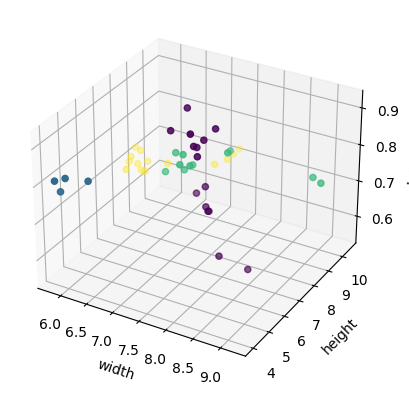

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'], c=y_train,marker='o')
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create classifier object

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

### Train the classifier

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy on test data

In [16]:
knn.score(X_test,y_test)

0.5333333333333333

### Prediction on new data

In [17]:
fruit_prediction = knn.predict([[100,8,8,0.6]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

In [18]:
fruit_prediction = knn.predict([[50,8,8,0.6]])
lookup_fruit_name[fruit_prediction[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

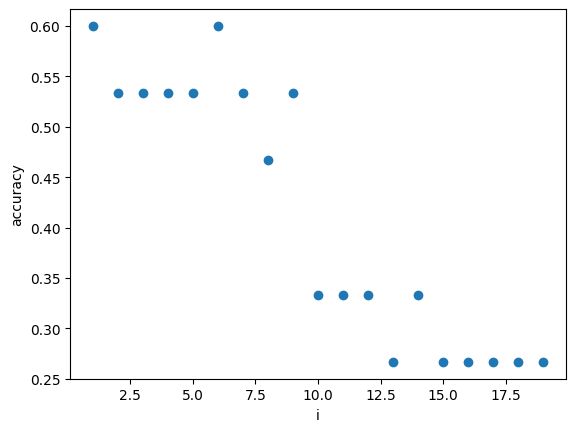

In [19]:
k_range = range(1,20)
scores = []

for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  scores.append(knn.score(X_test,y_test))

plt.figure()
plt.xlabel('i')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.show()


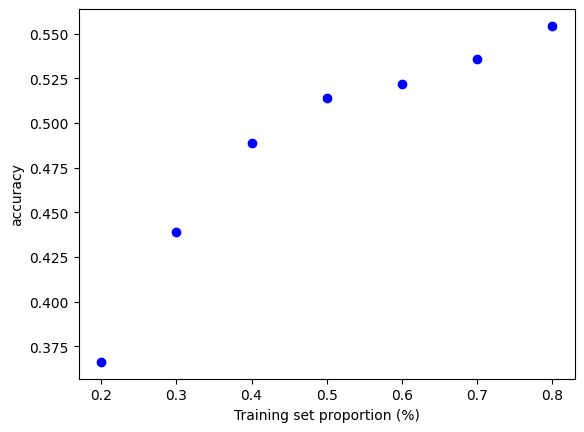

In [20]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000): # Run a 1000 tests for each combination of proportion and then average the accuracy score for plotting.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');